In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1000)

**Archivos de entrada**

In [2]:
Ruta_data_procesada = '../../Data/data_procesada'
Ruta_data_procesada_full = r'C:\Users\jalvarez\OneDrive\Estudios\Programacion\Soy Henry Datos e IA\Dataft21\PG\Data\data_procesada' # Donde estan todos los datasets no importa su peso por la limitante de GitHub. Si solo se tiene una única carpera 'Ruta_data_procesada' donde está todo pues colocar en ambas variables la misma ruta

**Archivos de google.**

In [3]:
reviews = pd.read_parquet(os.path.join(Ruta_data_procesada_full, "reviews_google_maps.parquet"))
user = pd.read_parquet(os.path.join(Ruta_data_procesada, "users_google_maps.parquet"))
restaurant = pd.read_parquet(os.path.join(Ruta_data_procesada, "restaurantes.parquet"))
categorias_dummies = pd.read_parquet(os.path.join(Ruta_data_procesada, "dummies_restaurantes.parquet"))

*Realizamos una visualización de los dataframes que tenemos para verificar que tipo de datos tenemos y la cantidad de los mismos.*

In [4]:
restaurant.head(2)

,name,address,state,city,postal_code,latitude,longitude,avg_rating,num_of_reviews,price_numeric,gmap_id,category
0,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, CA 90005",California,Los Angeles,90005,34.058092,-118.292130,4.4,18,0,0x80c2c778e3b73d33:0xbdc58662a4a97d49,Korean restaurant
1,Vons Chicken,"Vons Chicken, 12740 La Mirada Blvd, La Mirada, CA 90638",California,La Mirada,90638,33.916402,-118.010855,4.5,18,0,0x80dd2b4c8555edb7:0xfc33d65c4bdbef42,Restaurant


In [5]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22950 entries, 0 to 23113
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            22950 non-null  object 
 1   address         22950 non-null  object 
 2   state           22950 non-null  object 
 3   city            22950 non-null  object 
 4   postal_code     22950 non-null  int32  
 5   latitude        22950 non-null  float64
 6   longitude       22950 non-null  float64
 7   avg_rating      22950 non-null  float64
 8   num_of_reviews  22950 non-null  int64  
 9   price_numeric   22950 non-null  int32  
 10  gmap_id         22950 non-null  object 
 11  category        22950 non-null  object 
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 2.1+ MB


In [6]:
reviews.head(2)

,user_id,user_name,year,month,day,hour,rating,text,restaurant_name,state,city,gmap_id
0,109434968607034492648,Tony Pinto,2013,11,18,14:03:54.547,5,"I came by yesterday to pick up some pizza on the way home and the food was amazing. Best crust around - easily. I ordered a calzone, one chocolate slice (amazing), two cheese slices and a potato slice (all for my wife and me and lunch for her next day). Everything was perfect. The guy behind the counter seemed nice (I think he may have been the owner) and price-wise may have been a bit pricey, but then again, the pizza really is that much better and then again, pizza prices around the city are about the same. I'll definitely go back.",Raffaello Kosher Pizza,New_York,New York,0x89c258ffaeaba947:0x8355860772a595a9
1,108584493264435262292,Benji,2015,2,17,22:27:28.498,1,"Food was burnt and not good. You would think since they are a New York style pizzeria they would have a regular slice of pizza. But when I went they had no regular pizza just random other slices (which were later burnt and didn't taste good) . Anyway there are many other places to go to eat, I don't recommend it.",Raffaello Kosher Pizza,New_York,New York,0x89c258ffaeaba947:0x8355860772a595a9


In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1776939 entries, 0 to 1776938
Data columns (total 12 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   user_id          object
 1   user_name        object
 2   year             int32 
 3   month            int32 
 4   day              int32 
 5   hour             object
 6   rating           int64 
 7   text             object
 8   restaurant_name  object
 9   state            object
 10  city             object
 11  gmap_id          object
dtypes: int32(3), int64(1), object(8)
memory usage: 142.3+ MB


In [8]:
user.head(2)

,user_id,user_name,review_count,average_rating
0,104819208193648646391,Gregor J. Rothfuss,102,3.941176
1,106654503918907830147,The Corcoran Group,91,4.054945


In [9]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134121 entries, 0 to 1134120
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1134121 non-null  object 
 1   user_name       1134121 non-null  object 
 2   review_count    1134121 non-null  int64  
 3   average_rating  1134121 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 34.6+ MB


**Archivos YELP**

In [10]:
business = pd.read_parquet(os.path.join(Ruta_data_procesada_full, "Dataset_Business_simplificado.parquet"))
checkin = pd.read_parquet(os.path.join(Ruta_data_procesada_full, "Dataset_Checkin.parquet"))
reviews_yelp = pd.read_parquet(os.path.join(Ruta_data_procesada_full, "Dataset_Review_simplificado.parquet"))
tip = pd.read_parquet(os.path.join(Ruta_data_procesada, "Dataset_Tip.parquet"))
user_yelp = pd.read_parquet(os.path.join(Ruta_data_procesada, "Dataset_User_Elite.parquet"))

*Realizamos una visualización de los dataframes que tenemos para verificar que tipo de datos tenemos y la cantidad de los mismos.*

In [11]:
business.head(2)

,id_business,name,city,state,postal_code,latitude,longitude,stars,review_count,hours_Dataset_Business,first_category
6,3,St Honore Pastries,Philadelphia,Pennsylvania,19107,39.955505,-75.155564,4.0,80,"{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0', 'Thursday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0'}",Restaurants
1513,14,Zio's Italian Market,Largo,Florida,33771,27.916116,-82.760461,4.5,100,"{'Friday': '10:0-20:0', 'Monday': '10:0-18:0', 'Saturday': '10:0-20:0', 'Sunday': None, 'Thursday': '10:0-20:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0'}",Food


In [12]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8811 entries, 6 to 52612402
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_business             8811 non-null   int64  
 1   name                    8811 non-null   object 
 2   city                    8811 non-null   object 
 3   state                   8811 non-null   object 
 4   postal_code             8811 non-null   int64  
 5   latitude                8811 non-null   float64
 6   longitude               8811 non-null   float64
 7   stars                   8811 non-null   float64
 8   review_count            8811 non-null   int64  
 9   hours_Dataset_Business  8811 non-null   object 
 10  first_category          8811 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 826.0+ KB


In [13]:
checkin.head(2)

,business_id,hour,date,year,month
0,---kPU91CF4Lq2-WlRu9Lw,21:10:56,2020-03-13,2020,3
1,---kPU91CF4Lq2-WlRu9Lw,22:18:06,2020-06-02,2020,6


In [14]:
checkin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13353332 entries, 0 to 13356874
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   business_id  object        
 1   hour         object        
 2   date         datetime64[ns]
 3   year         int32         
 4   month        int32         
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 509.4+ MB


In [15]:
reviews_yelp.head(2)

,user_id,stars_Dataset_Review,text,id_review,id_user,id_business,anho,mes,dia,hora,name,city,state,stars_Dataset_Business,review_count,yelp_id
0,mh_-eMZ6K5RLWhZyISBhwA,3.0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",0,124234,1867,2018,07,07,22:09:11,Turning Point of North Wales,North Wales,Pennsylvania,3.0,169,mh_-eMZ6K5RLWhZyISBhwA
6,59MxRhNVhU9MYndMkz0wtw,3.0,"Had a party of 6 here for hibachi. Our waitress brought our separate sushi orders on one plate so we couldn't really tell who's was who's and forgot several items on an order. I understand making mistakes but the restaraunt was really quiet so we were kind of surprised. Usually hibachi is a fun lively experience and our cook said maybe three words, but he cooked very well his name was Francisco. Service was fishy, food was pretty good, and im hoping it was just an off night here. But for the money I wouldn't go back.",9,114367,14917,2016,07,25,07:31:06,Hibachi Steak House & Sushi Bar,Santa Barbara,California,3.5,488,59MxRhNVhU9MYndMkz0wtw


In [16]:
reviews_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 767182 entries, 0 to 3514967
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 767182 non-null  object 
 1   stars_Dataset_Review    767182 non-null  float64
 2   text                    767182 non-null  object 
 3   id_review               767182 non-null  int64  
 4   id_user                 767182 non-null  int64  
 5   id_business             767182 non-null  int64  
 6   anho                    767182 non-null  object 
 7   mes                     767182 non-null  object 
 8   dia                     767182 non-null  object 
 9   hora                    767182 non-null  object 
 10  name                    767182 non-null  object 
 11  city                    767182 non-null  object 
 12  state                   767182 non-null  object 
 13  stars_Dataset_Business  767182 non-null  float64
 14  review_count            

In [17]:
tip.head(2)

,id_user,id_business,text,date,compliment_count
0,66477,140105,They have lots of good deserts and tasty cuban sandwiches,2013-02-05 18:35:10,0
1,49975,865,It's open even when you think it isn't,2013-08-18 00:56:08,0


In [18]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433330 entries, 0 to 433367
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_user           433330 non-null  int64 
 1   id_business       433330 non-null  int64 
 2   text              433330 non-null  object
 3   date              433330 non-null  object
 4   compliment_count  433330 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 19.8+ MB


In [19]:
user_yelp.head(2)

,id_user,years
0,0,2007
1,1,2009


Se realizará un análisis para definir la calidad de los datos de cada uno de los dataframes con los que contamos y la calidad se calculará verificando la cantidad de datos nulos, datos faltantes y dato duplicados, esto se representará con un % (porcentaje) calculado por el total de datos existente dividido por la cantidad de datos faltantes.

**Verificación de datos "Nulos" de cada Dataframes de Google.**

*Nulos dataframe "restaurant".*

In [20]:
restaurant.isnull().sum()

name              0
address           0
state             0
city              0
postal_code       0
latitude          0
longitude         0
avg_rating        0
num_of_reviews    0
price_numeric     0
gmap_id           0
category          0
dtype: int64

Se realizó una verificación de todas las columnas del dataframe "restaurant" en busca de datos nulos. El resultado reveló la ausencia total de datos nulos equivalente a un 0%, lo que nos lleva a concluir que la calidad de los datos en este término es óptima.

*Nulos dataframe "reviews".*

In [21]:
reviews.isnull().sum()

user_id            0
user_name          0
year               0
month              0
day                0
hour               0
rating             0
text               0
restaurant_name    0
state              0
city               0
gmap_id            0
dtype: int64

Se realizó una verificación de todas las columnas del dataframe "reviews" en busca de datos nulos. El resultado reveló la ausencia total de datos nulos equivalente a un 0%, lo que nos lleva a concluir que la calidad de los datos en este término es óptima.

*Nulos dataframe "user".*

In [22]:
user.isnull().sum()

user_id           0
user_name         0
review_count      0
average_rating    0
dtype: int64

Se realizó una verificación de todas las columnas del dataframe "user" en busca de datos nulos. El resultado reveló la ausencia total de datos nulos, lo cual equivale a un 0%, lo que nos lleva a concluir que la calidad de los datos en este término es óptima.

**Verificación de datos duplicados Google**

*Duplicados dataframe "restaurant".*

En relación con la detección de datos duplicados en el DataFrame "restaurant", se focalizará exclusivamente en la columna "address" debido a la naturaleza del conjunto de datos. La identificación de duplicados en esta columna indicaría una anomalía, ya que no se espera que existan múltiples restaurantes en la misma ubicación.

In [23]:
duplicados = restaurant[restaurant.duplicated(subset='address')]
duplicados

,name,address,state,city,postal_code,latitude,longitude,avg_rating,num_of_reviews,price_numeric,gmap_id,category


Tras llevar a cabo la validación de duplicados en la columna "address", se constató la ausencia de repeticiones, lo que sugiere una alta integridad de datos en el DataFrame "restaurant".

*Duplicados dataframe "reviews".*

In [24]:
duplicados = reviews[reviews.duplicated(subset=['user_id', 'hour'], keep=False)]
duplicados

,user_id,user_name,year,month,day,hour,rating,text,restaurant_name,state,city,gmap_id
0,109434968607034492648,Tony Pinto,2013,11,18,14:03:54.547,5,"I came by yesterday to pick up some pizza on the way home and the food was amazing. Best crust around - easily. I ordered a calzone, one chocolate slice (amazing), two cheese slices and a potato slice (all for my wife and me and lunch for her next day). Everything was perfect. The guy behind the counter seemed nice (I think he may have been the owner) and price-wise may have been a bit pricey, but then again, the pizza really is that much better and then again, pizza prices around the city are about the same. I'll definitely go back.",Raffaello Kosher Pizza,New_York,New York,0x89c258ffaeaba947:0x8355860772a595a9
1,108584493264435262292,Benji,2015,2,17,22:27:28.498,1,"Food was burnt and not good. You would think since they are a New York style pizzeria they would have a regular slice of pizza. But when I went they had no regular pizza just random other slices (which were later burnt and didn't taste good) . Anyway there are many other places to go to eat, I don't recommend it.",Raffaello Kosher Pizza,New_York,New York,0x89c258ffaeaba947:0x8355860772a595a9
2,108987049306954366378,Michael Rahmani,2014,12,30,22:43:47.508,1,"This place is horrible. I ordered two ziti pizza's and my friend ordered regular. It tasted like complete garbage. It was 11 dollars for two ziti square pizza's and a can! The guy behind the counter was nice, though. The place looks bigger in these photos but it is not so big. There were no tables open so we and a lot of people were waiting a couple minutes to sit down. PLEASE SPEND YOUR MONEY ELSEWHERE! THERE ARE BETTER RESTAURANTS!",Raffaello Kosher Pizza,New_York,New York,0x89c258ffaeaba947:0x8355860772a595a9
3,107767094884093007779,eliau piha,2014,7,6,23:26:13.836,5,Love their pizza and their service!\nREALLY ITALIANO!,Raffaello Kosher Pizza,New_York,New York,0x89c258ffaeaba947:0x8355860772a595a9
4,107373453968933712290,Matt Schaffnit,2016,10,25,08:30:54.4,5,Used to get lunch here nearly every day. You will be missed.,Raffaello Kosher Pizza,New_York,New York,0x89c258ffaeaba947:0x8355860772a595a9
...,...,...,...,...,...,...,...,...,...,...,...,...
1771572,111588294688947866534,David Marlon,2018,2,22,15:03:35.747,5,Great mexican food with a gourmet twist. Personable and engaging staff and good drinks I hear.,El Sombrero Mexican Bistro,Nevada,Las Vegas,0x80c8c39a24d257e3:0xc2e8787e4925ec72
1771585,102383499928688600749,Rickg Aguirre,2019,2,8,01:51:28.622,1,They are close,El Sombrero Mexican Bistro,Nevada,Las Vegas,0x80c8c39a24d257e3:0xc2e8787e4925ec72
1771593,102383499928688600749,Rickg Aguirre,2019,2,8,01:51:28.622,1,They are close,El Sombrero Mexican Bistro,Nevada,Las Vegas,0x80c8c39a24d257e3:0xc2e8787e4925ec72
1771664,100712857990209470412,Joshua Baron,2021,5,5,19:04:34.278,5,Amazing Carnitas and terrific Pizza!,Carnitas King,Nevada,Las Vegas,0x80c8c8852ac55555:0x54fdc578f0d448a2


In [25]:
duplicados = reviews[reviews.duplicated(subset='user_id') & reviews.duplicated(subset='hour')].value_counts()
duplicados

user_id                user_name                year  month  day  hour          rating  text                                                                                                                                                                                        restaurant_name                   state       city                gmap_id                              
105594160560423982695  Randy Eldridge           2019  3      3    21:42:11.294  5       Cool spot never a problem here                                                                                                                                                              IHOP                              California  Union City          0x808f95c508d7725b:0x2ec9b936301fa5d9    3
112805528997468087757  Abby Grace               2021  6      19   01:23:58.934  5       SD                                                                                                                                                 

In [26]:
reviews

,user_id,user_name,year,month,day,hour,rating,text,restaurant_name,state,city,gmap_id
0,109434968607034492648,Tony Pinto,2013,11,18,14:03:54.547,5,"I came by yesterday to pick up some pizza on the way home and the food was amazing. Best crust around - easily. I ordered a calzone, one chocolate slice (amazing), two cheese slices and a potato slice (all for my wife and me and lunch for her next day). Everything was perfect. The guy behind the counter seemed nice (I think he may have been the owner) and price-wise may have been a bit pricey, but then again, the pizza really is that much better and then again, pizza prices around the city are about the same. I'll definitely go back.",Raffaello Kosher Pizza,New_York,New York,0x89c258ffaeaba947:0x8355860772a595a9
1,108584493264435262292,Benji,2015,2,17,22:27:28.498,1,"Food was burnt and not good. You would think since they are a New York style pizzeria they would have a regular slice of pizza. But when I went they had no regular pizza just random other slices (which were later burnt and didn't taste good) . Anyway there are many other places to go to eat, I don't recommend it.",Raffaello Kosher Pizza,New_York,New York,0x89c258ffaeaba947:0x8355860772a595a9
2,108987049306954366378,Michael Rahmani,2014,12,30,22:43:47.508,1,"This place is horrible. I ordered two ziti pizza's and my friend ordered regular. It tasted like complete garbage. It was 11 dollars for two ziti square pizza's and a can! The guy behind the counter was nice, though. The place looks bigger in these photos but it is not so big. There were no tables open so we and a lot of people were waiting a couple minutes to sit down. PLEASE SPEND YOUR MONEY ELSEWHERE! THERE ARE BETTER RESTAURANTS!",Raffaello Kosher Pizza,New_York,New York,0x89c258ffaeaba947:0x8355860772a595a9
3,107767094884093007779,eliau piha,2014,7,6,23:26:13.836,5,Love their pizza and their service!\nREALLY ITALIANO!,Raffaello Kosher Pizza,New_York,New York,0x89c258ffaeaba947:0x8355860772a595a9
4,107373453968933712290,Matt Schaffnit,2016,10,25,08:30:54.4,5,Used to get lunch here nearly every day. You will be missed.,Raffaello Kosher Pizza,New_York,New York,0x89c258ffaeaba947:0x8355860772a595a9
...,...,...,...,...,...,...,...,...,...,...,...,...
1776934,104738794941653941230,tony mcconnell,2019,12,16,18:22:47.537,3,SD,Starbucks,Nevada,Las Vegas,0x80c8c472d67f79af:0x8956b6d25312efae
1776935,111736095418749525736,Ingrid Cavalcante,2019,10,15,09:42:58.929,5,SD,Starbucks,Nevada,Las Vegas,0x80c8c472d67f79af:0x8956b6d25312efae
1776936,116151678810850381756,harry bhullar,2020,11,11,02:39:29.686,5,SD,Starbucks,Nevada,Las Vegas,0x80c8c472d67f79af:0x8956b6d25312efae
1776937,101316597947805028436,Pam Willett,2018,7,18,23:47:28.518,5,SD,Starbucks,Nevada,Las Vegas,0x80c8c472d67f79af:0x8956b6d25312efae


In [27]:
reviews[reviews['user_id'] == '101001321250592869991']

,user_id,user_name,year,month,day,hour,rating,text,restaurant_name,state,city,gmap_id
1168800,101001321250592869991,Luis Briceno,2019,8,10,18:32:49.186,5,(Translated by Google) Very good place and very clean everything !!\n\n(Original)\nMuy buen lugar y muy limpio todo!!,La Superior Panaderia,California,Los Angeles,0x80c2c798ad41d859:0x8823cd86d2abd5b3
1168802,101001321250592869991,Luis Briceno,2019,8,10,18:32:49.186,5,(Translated by Google) Very good place and very clean everything !!\n\n(Original)\nMuy buen lugar y muy limpio todo!!,La Superior Panaderia,California,Los Angeles,0x80c2c798ad41d859:0x8823cd86d2abd5b3
1169480,101001321250592869991,Luis Briceno,2019,8,10,18:32:49.186,5,(Translated by Google) Very good place and very clean everything !!\n\n(Original)\nMuy buen lugar y muy limpio todo!!,La Superior Panaderia,California,Los Angeles,0x80c2c798ad41d859:0x8823cd86d2abd5b3
1169482,101001321250592869991,Luis Briceno,2019,8,10,18:32:49.186,5,(Translated by Google) Very good place and very clean everything !!\n\n(Original)\nMuy buen lugar y muy limpio todo!!,La Superior Panaderia,California,Los Angeles,0x80c2c798ad41d859:0x8823cd86d2abd5b3


Tras llevar a cabo una inspección en el DataFrame "reviews" en busca de duplicados, se identificaron un total de 77,810  registros duplicados de un conjunto de 1'776,939   datos, lo que representa un porcentaje del 4.38%. Por ende, se concluye que el 95.62% de los datos no están duplicados, lo que indica una calidad de datos (media) aceptable en el conjunto analizado.

*Duplicados dataframe "user".*

In [28]:
duplicados = user[user.duplicated(subset='user_id') ].value_counts()
duplicados

user_id                user_name                           review_count  average_rating
100003708628889270275  Tanya Estrada                       1             5.0               1
112343666577668729339  Carla Sowinski                      1             5.0               1
112374973608577017530  Darin Myles (Darin Somerville)      1             4.0               1
112384518222662971412  Johannah Wierzchowski (Jojo)        1             3.0               1
112385658694073664364  nope nope                           1             2.0               1
                                                                                          ..
106643002279097780862  Sicario “Operations” Mod            1             5.0               1
106646077100722717750  DanielMyManiel                      2             5.0               1
106664880530848195495  Thread Rolling USA (LMT USA)        1             4.0               1
106668839169472489708  Lorski M.                           1             5.

Después de investigar la presencia de datos duplicados en el DataFrame "user", se determinó que, dada la naturaleza inherente del conjunto de datos, la existencia de duplicados no necesariamente indicaría un error.

**Verificación de datos faltantes de Google**

*Datos faltantes dataframe "restaurant"*

In [29]:
restaurant[restaurant['category'] == '']

,name,address,state,city,postal_code,latitude,longitude,avg_rating,num_of_reviews,price_numeric,gmap_id,category


Tras un análisis del dataframe "restaurant" en busca de datos faltantes, se determinó que no existen ausencias de datos en ninguna parte del dataframe. Por consiguiente, se concluye que el dataframe presenta una alta calidad de datos.

*Datos faltantes dataframe "reviews"*

In [30]:
reviews[reviews['gmap_id']== '']

,user_id,user_name,year,month,day,hour,rating,text,restaurant_name,state,city,gmap_id


Tras un análisis del dataframe "reviews" en busca de datos faltantes, se determinó que no existen ausencias de datos en ninguna parte del dataframe. Por consiguiente, se concluye que el dataframe presenta una alta calidad de datos.

*Datos faltantes dataframe "user"*

In [31]:
user[user['average_rating'] == '']

,user_id,user_name,review_count,average_rating


Tras un análisis del dataframe "user" en busca de datos faltantes, se determinó que no existen ausencias de datos en ninguna parte del dataframe. Por consiguiente, se concluye que el dataframe presenta una alta calidad de datos.

**Verificación de datos "Nulos" de cada Dataframes de YELP.**

*Nulos dataframe "business"*

In [32]:
business.isnull().sum()

id_business               0
name                      0
city                      0
state                     0
postal_code               0
latitude                  0
longitude                 0
stars                     0
review_count              0
hours_Dataset_Business    0
first_category            0
dtype: int64

Se realizó una verificación de todas las columnas del dataframe "business" en busca de datos nulos. El resultado reveló la ausencia total de datos nulos, lo cual equivale a un 0%, lo que nos lleva a concluir que la calidad de los datos en este término es óptima.

*Datos nulos del dataframe "Checkin"*

In [33]:
checkin.isnull().sum()

business_id    0
hour           0
date           0
year           0
month          0
dtype: int64

Se realizó una verificación de todas las columnas del dataframe "checkin" en busca de datos nulos. El resultado reveló la ausencia total de datos nulos, lo cual equivale a un 0%, lo que nos lleva a concluir que la calidad de los datos en este término es óptima.

*Datos nulos del dataframe "reviews_yelp"*

In [34]:
reviews_yelp.isnull().sum()

user_id                   0
stars_Dataset_Review      0
text                      0
id_review                 0
id_user                   0
id_business               0
anho                      0
mes                       0
dia                       0
hora                      0
name                      0
city                      0
state                     0
stars_Dataset_Business    0
review_count              0
yelp_id                   0
dtype: int64

Se realizó una verificación de todas las columnas del dataframe "reviews_yelp" en busca de datos nulos. El resultado reveló la ausencia total de datos nulos, lo cual equivale a un 0%, lo que nos lleva a concluir que la calidad de los datos en este término es óptima.

*Datos nulos del dataframe "tip"*

In [35]:
tip.isnull().sum()

id_user             0
id_business         0
text                0
date                0
compliment_count    0
dtype: int64

Se realizó una verificación de todas las columnas del dataframe "tip" en busca de datos nulos. El resultado reveló la ausencia total de datos nulos, lo cual equivale a un 0%, lo que nos lleva a concluir que la calidad de los datos en este término es óptima.

*Datos nulos del dataframe "user_yelp"*

In [36]:
user_yelp.isnull().sum()

id_user          0
years      1896699
dtype: int64

La alta cantidad de nulos es por la estructura del dataset

**Verificación de datos duplicados de YELP**

*Datos duplicados del dataframe "business"

In [37]:
# duplicados = business[business.duplicated(subset=['address', 'latitude', 'longitude'], keep=False) & ~business.duplicated(subset=['address', 'latitude', 'longitude', 'state'], keep=False)]
duplicados = business[business.duplicated(subset=['latitude', 'longitude'], keep=False) & ~business.duplicated(subset=['latitude', 'longitude', 'state'], keep=False)]
duplicados

,id_business,name,city,state,postal_code,latitude,longitude,stars,review_count,hours_Dataset_Business,first_category


In [38]:
business

,id_business,name,city,state,postal_code,latitude,longitude,stars,review_count,hours_Dataset_Business,first_category
6,3,St Honore Pastries,Philadelphia,Pennsylvania,19107,39.955505,-75.155564,4.0,80,"{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0', 'Thursday': '7:0-20:0', 'Tuesday': '7:0-20:0', 'Wednesday': '7:0-20:0'}",Restaurants
1513,14,Zio's Italian Market,Largo,Florida,33771,27.916116,-82.760461,4.5,100,"{'Friday': '10:0-20:0', 'Monday': '10:0-18:0', 'Saturday': '10:0-20:0', 'Sunday': None, 'Thursday': '10:0-20:0', 'Tuesday': '10:0-20:0', 'Wednesday': '10:0-20:0'}",Food
17041,23,Romano's Macaroni Grill,Reno,Nevada,89502,39.476117,-119.789339,2.5,339,"{'Friday': '11:0-21:0', 'Monday': '11:0-22:0', 'Saturday': '12:0-21:0', 'Sunday': '11:0-21:0', 'Thursday': '11:0-20:0', 'Tuesday': '11:0-22:0', 'Wednesday': '10:0-22:0'}",Restaurants
23787,31,DeSandro on Main,Philadelphia,Pennsylvania,19127,40.022466,-75.218314,3.0,41,"{'Friday': '17:0-0:30', 'Monday': None, 'Saturday': '17:0-0:30', 'Sunday': '17:0-21:30', 'Thursday': '17:0-1:30', 'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1:30'}",Pizza
24221,33,Ardmore Pizza,Ardmore,Pennsylvania,19003,40.006707,-75.289671,3.5,109,"{'Friday': '11:0-1:0', 'Monday': '11:0-0:0', 'Saturday': '11:0-1:0', 'Sunday': '11:0-0:0', 'Thursday': '11:0-0:0', 'Tuesday': '11:0-0:0', 'Wednesday': '11:0-0:0'}",Pizza
...,...,...,...,...,...,...,...,...,...,...,...
52611748,150260,Sage Mediterranean,Phoenixville,Pennsylvania,19460,40.134042,-75.514528,4.0,118,"{'Friday': '11:30-22:30', 'Monday': None, 'Saturday': '11:30-22:30', 'Sunday': '11:30-22:30', 'Thursday': '11:30-22:30', 'Tuesday': '11:30-22:30', 'Wednesday': '11:30-22:30'}",Restaurants
52611919,150273,Rustica Restaurant Pizzera,New Hope,Pennsylvania,18938,40.346275,-75.035753,3.0,21,"{'Friday': '9:0-20:0', 'Monday': '9:0-20:0', 'Saturday': '8:30-15:30', 'Sunday': None, 'Thursday': '9:0-20:0', 'Tuesday': '9:0-20:0', 'Wednesday': '9:0-20:0'}",Pizza
52611971,150287,Ali Baba Magic Food,Philadelphia,Pennsylvania,19104,39.953391,-75.196765,4.0,8,"{'Friday': '9:0-20:0', 'Monday': '9:0-20:0', 'Saturday': '8:30-15:30', 'Sunday': None, 'Thursday': '9:0-20:0', 'Tuesday': '9:0-20:0', 'Wednesday': '9:0-20:0'}",Restaurants
52611980,150290,Pizza Guru,Santa Barbara,California,93105,34.440689,-119.739681,4.0,299,"{'Friday': '15:0-21:0', 'Monday': '15:0-21:0', 'Saturday': '15:0-21:0', 'Sunday': '15:0-21:0', 'Thursday': '15:0-21:0', 'Tuesday': '15:0-21:0', 'Wednesday': '15:0-21:0'}",Restaurants


*Datos duplicados del dataframe "checkin"*

In [39]:
duplicados1 = checkin[checkin.duplicated(subset=['business_id', 'hour', 'date'], keep=False)]
duplicados1

,business_id,hour,date,year,month


Una vez terminada la verificación de los datos duplicados en el dataframe “checkin” se encontraron la cantidad de 0 de datos duplicados con lo cual concluimos que se tiene una  buena calidad de datos.

*Duplicados del dataframe "reviews_yelp"*

In [40]:
reviews_yelp

,user_id,stars_Dataset_Review,text,id_review,id_user,id_business,anho,mes,dia,hora,name,city,state,stars_Dataset_Business,review_count,yelp_id
0,mh_-eMZ6K5RLWhZyISBhwA,3.0,"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.",0,124234,1867,2018,07,07,22:09:11,Turning Point of North Wales,North Wales,Pennsylvania,3.0,169,mh_-eMZ6K5RLWhZyISBhwA
6,59MxRhNVhU9MYndMkz0wtw,3.0,"Had a party of 6 here for hibachi. Our waitress brought our separate sushi orders on one plate so we couldn't really tell who's was who's and forgot several items on an order. I understand making mistakes but the restaraunt was really quiet so we were kind of surprised. Usually hibachi is a fun lively experience and our cook said maybe three words, but he cooked very well his name was Francisco. Service was fishy, food was pretty good, and im hoping it was just an off night here. But for the money I wouldn't go back.",9,114367,14917,2016,07,25,07:31:06,Hibachi Steak House & Sushi Bar,Santa Barbara,California,3.5,488,59MxRhNVhU9MYndMkz0wtw
8,smOvOajNG0lS4Pq7d8g4JQ,4.0,"Good food--loved the gnocchi with marinara\nthe baked eggplant appetizer was very good too\n\nThe service was very slow, but despite this, I'd go back, the food is just that good",13,24713,8374,2009,10,14,19:57:14,LaScala's,Philadelphia,Pennsylvania,3.5,367,smOvOajNG0lS4Pq7d8g4JQ
12,IQsF3Rc6IgCzjVV9DE8KXg,5.0,"My absolute favorite cafe in the city. Their black and white latte is probably the best I've ever had (not too sweet and just the right amount of foam), soups are always really good (even for non-soup people) and there's just a lot of space to do work. The noise level is perfect, the music is at a perfect level, and I always enjoy when patrons bring their dogs. I'll keep giving them my business for as long as I can.",19,25591,5086,2014,11,12,15:30:27,Good Karma Cafe,Philadelphia,Pennsylvania,4.0,249,IQsF3Rc6IgCzjVV9DE8KXg
14,OhECKhQEexFypOMY6kypRw,4.0,"Yes, this is the only sushi place in town. However, it is great when you're craving sushi and don't have time to go somewhere else. The salmon is probably the best fish they have, so we always order salmon. We also love their spicy edamame, tempura, ocean salad, and cabbage salad. Service has always been friendly and quick!",23,126430,5247,2013,09,04,03:48:20,Sushi Teri,Carpinteria,California,3.0,167,OhECKhQEexFypOMY6kypRw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514949,gkg9VqsxPCgpfYXO1dl8CA,4.0,"I decided to try this place out after Christmas to beat the crowd. It's definitely the perfect pop-up bar for the holidays, despite its small size. Not only does it have cute photo opportunities but there are holiday-themed cocktails and so many beautiful Christmas decorations. When we went there was a 5$ cover charge which we were not expecting since the ""Nightmare Before Tinsel"" pop-up did not have any cover. If you are looking for a Christmas spirited bar then the 5$ is worth it. The drinks, on the other hand, are overpriced and you're better off taking your pictures and just ordering a drink not on the cocktail menu.",6990235,295006,147605,2020,01,13,04:21:38,Tinsel,Philadelphia,Pennsylvania,3.0,79,gkg9VqsxPCgpfYXO1dl8CA
3514951,bJ5FtCtZX3ZZacz2_2PJjA,4.0,"South Street Diner isn't the best of Philly Diners. but It's always the house of some good memories. Back when I used to be big on Industrial music my friends and I would come here for a 2 AM breakfast fix after a night at the club. all the locals would give us confused looks that were monumental. \nI've had

In [41]:
duplicados = reviews_yelp[reviews_yelp.duplicated(subset=['user_id','anho', 'mes', 'dia', 'hora'], keep=False)]
duplicados.head(2)

,user_id,stars_Dataset_Review,text,id_review,id_user,id_business,anho,mes,dia,hora,name,city,state,stars_Dataset_Business,review_count,yelp_id
3641,QUdKrOA3Iv1laFNRgq8W-g,2.0,"I went here with a friend who had a Groupon. The sushi was horrible, full of filler breadcrums and very skimpy on fish. They took a lot of time and care to decorate the plate with fresh orchids and I wish that they would have invested this extra money into giving us more fish in our rolls.",7115,43092,12856,2013,12,08,18:03:09,Crazy Sushi,Philadelphia,Pennsylvania,4.0,550,QUdKrOA3Iv1laFNRgq8W-g
5965,xwUWFYaT8SGbKQuMCqD8fg,5.0,"A friend and I were visiting PA for the first time this Memorial Day weekend. We were in pursuit of a good place to eat. We passed Han Dynasty and like the ambience. We decided to give it a try. We sat at the bar area. The two gentlemen working the bar were extremely helpful and welcoming. They explained the menu to us. Everything is cooked fresh. We love spicy food. The hotter the better; the food was so amazingly flavorful I would drive back from Washington, DC just to eat here again. I had the Cumin Pork spiced to level 10 my friend had chicken fried rice. We like very hot food most places even in DC cannot get the balance of heat and flavor right even when dishes are request extra spicy. Han Dynasty did!! The customer service and the food are worth giving this place a try if you like spicy food. It would be a great business move for them if they opened one in the District of Columbia. Well done guys!!",11759,164225,1937,2014,05,27,17:52:40,Han Dynasty,Philadelphia,Pennsylvania,4.0,783,xwUWFYaT8SGbKQuMCqD8fg


Después de la verificación de los datos duplicados en el dataframe “reviews_yelp” se encontró la cantidad de 244 de datos duplicados equivalente a un 0.03% de un total 767,182  . Con lo cual se tiene una calidad aceptable de datos.

*Datos duplicados del dataframe "tip"*

In [44]:
duplicados = tip[tip.duplicated(subset=['id_user','id_business','date', 'text'], keep=False)]
duplicados

,id_user,id_business,text,date,compliment_count


In [45]:
tip[(tip['id_user']==7914) & (tip['id_business']==200076) & (tip['text']=='LM') & (tip['date']=='2011-11-22 12:48:02')]

,id_user,id_business,text,date,compliment_count


Una vez terminada la verificación de los datos duplicados en el dataframe "tip" se encontraron la cantidad de 0 de datos duplicados con lo cual concluimos que se tiene una  buena calidad de datos.

*Datos duplicados del dataframe "user_yelp"*

In [46]:
user_yelp[user_yelp.duplicated(subset=['id_user', 'years'], keep=False)]

,id_user,years
1,1,2020
1,1,2020
18,18,2020
18,18,2020
29,29,2020
...,...,...
1966851,1966851,2020
1971939,1971939,2020
1971939,1971939,2020
1976641,1976641,2020


Una vez terminada la verificación de los datos duplicados en el dataframe “user_yelp” se encontraron la cantidad de 79,858 de datos duplicados equivalente a un 3.506% de un total 2,277,195. Con lo cual concluimos que el 98.245% de los datos NO son duplicados, teniendo una calidad buena de datos.

**Verificación de datos faltantes de YELP**

*Datos faltantes dataframe "business"*

In [48]:
business[business['hours_Dataset_Business'] == '']

,id_business,name,city,state,postal_code,latitude,longitude,stars,review_count,hours_Dataset_Business,first_category


*Datos faltantes del dataframe "checkin"*

In [49]:
checkin[checkin['month']== '']

,business_id,hour,date,year,month


Una vez analisado el dataframe “checkin” en búsqueda de datos faltantes, encontramos la cantidad de 0 de datos faltantes de un total 124,757 datos del dataframe.  Con lo cual concluimos que el 100% de los datos del dataframe NO son faltantes, teniendo una calidad buena de datos.

*Datos faltantes del dataframe "reviews_yelp"*

In [50]:
print(reviews_yelp[reviews_yelp['anho']== ''])
print(reviews_yelp[reviews_yelp['mes']== ''])
print(reviews_yelp[reviews_yelp['dia']== ''])
print(reviews_yelp[reviews_yelp['hora']== ''])

Empty DataFrame
Columns: [user_id, stars_Dataset_Review, text, id_review, id_user, id_business, anho, mes, dia, hora, name, city, state, stars_Dataset_Business, review_count, yelp_id]
Index: []
Empty DataFrame
Columns: [user_id, stars_Dataset_Review, text, id_review, id_user, id_business, anho, mes, dia, hora, name, city, state, stars_Dataset_Business, review_count, yelp_id]
Index: []
Empty DataFrame
Columns: [user_id, stars_Dataset_Review, text, id_review, id_user, id_business, anho, mes, dia, hora, name, city, state, stars_Dataset_Business, review_count, yelp_id]
Index: []
Empty DataFrame
Columns: [user_id, stars_Dataset_Review, text, id_review, id_user, id_business, anho, mes, dia, hora, name, city, state, stars_Dataset_Business, review_count, yelp_id]
Index: []


Después de analizar el dataframe “reviews_yelp” en búsqueda de datos faltantes, encontramos la cantidad de 0 de datos faltantes de un total 3'775,931  datos del dataframe.  Con lo cual concluimos que el 100% de los datos del dataframe NO son faltantes, teniendo una calidad buena de datos.

*Datos faltantes del dataframe "tip"*

In [51]:
tip[tip['compliment_count'] == '']

,id_user,id_business,text,date,compliment_count


Tras analizar el dataframe "tip" en búsqueda de datos faltantes, encontramos la cantidad de 0 de datos faltantes de un total 677,160  datos del dataframe.  Con lo cual concluimos que el 100% de los datos del dataframe NO son faltantes, teniendo una calidad buena de datos.

*Datos faltantes del dataframe "user_yelp"*

In [52]:
user_yelp[user_yelp['years']== '']

,id_user,years


Una vez analizado el dataframe "user_yelp" en búsqueda de datos faltantes, encontramos la cantidad de 0 de datos faltantes de un total 2,277,195 datos del dataframe.  Con lo cual concluimos que el 100% de los datos del dataframe NO son faltantes, teniendo una calidad buena de datos.

Uso de graficas para el analisis exploratorio.

*Top 5 por Estados Google.*

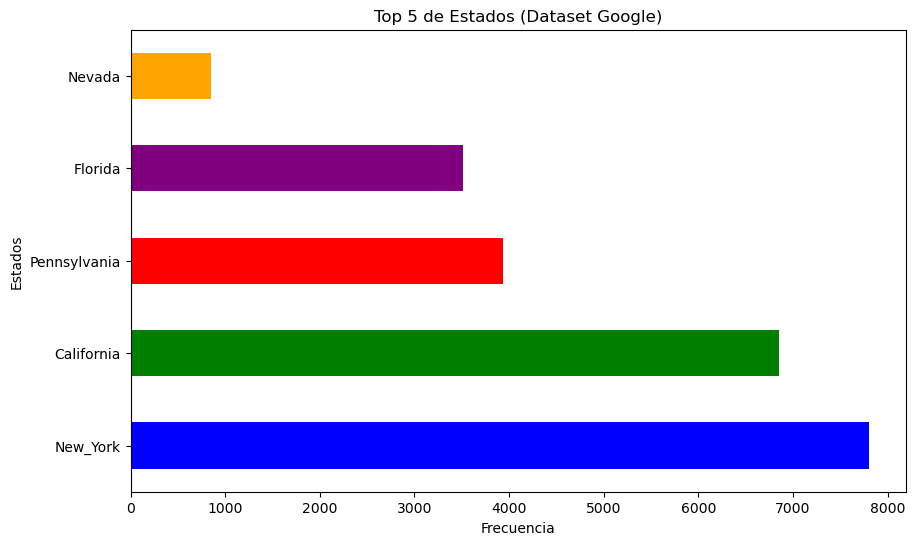

In [54]:
top_5_states = restaurant['state'].value_counts()

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']  
top_5_states.plot(kind='barh', color=colors) 
plt.xlabel('Frecuencia')
plt.ylabel('Estados')
plt.title('Top 5 de Estados (Dataset Google)')
plt.show()

Ahora, procederemos a analizar el estado con el mayor número de negocios, con el fin de proponer lugares óptimo para realizar inversiones. Según la información proporcionada por el gráfico previo, se determina que el estado de Nueva York ocupa el primer lugar, seguido de cerca por el estado de California. Basándonos en este análisis, podemos delinear el espacio geográfico para futuras inversiones.

*Top por Estado Yelp*

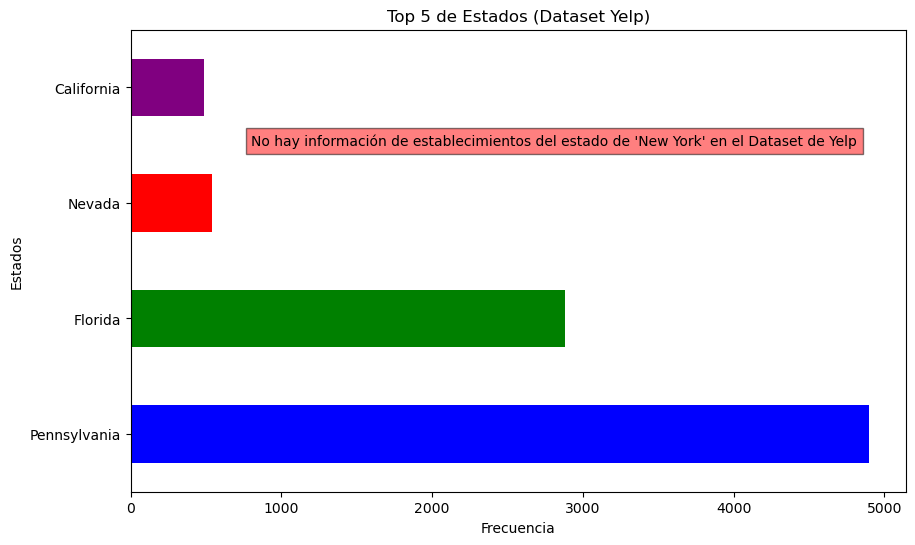

In [99]:
top_5_states = business['state'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange']
top_5_states.plot(kind='barh', color=colors) 
plt.xlabel('Frecuencia')
plt.ylabel('Estados')
plt.title('Top 5 de Estados (Dataset Yelp)')
plt.text(x=800, y=2.5, s="No hay información de establecimientos del estado de 'New York' en el Dataset de Yelp",  bbox=dict(facecolor='red', alpha=0.5))
plt.show()

Después de examinar detenidamente el gráfico anterior, se evidencia que el estado de Pennsylvania ocupa el primer puesto, mientras que Nevada ocupa el quinto lugar. Esta observación sugiere que Pennsylvania alberga la mayor cantidad de establecimientos.

*Top 10 de ciudades en el estado de nueva york*

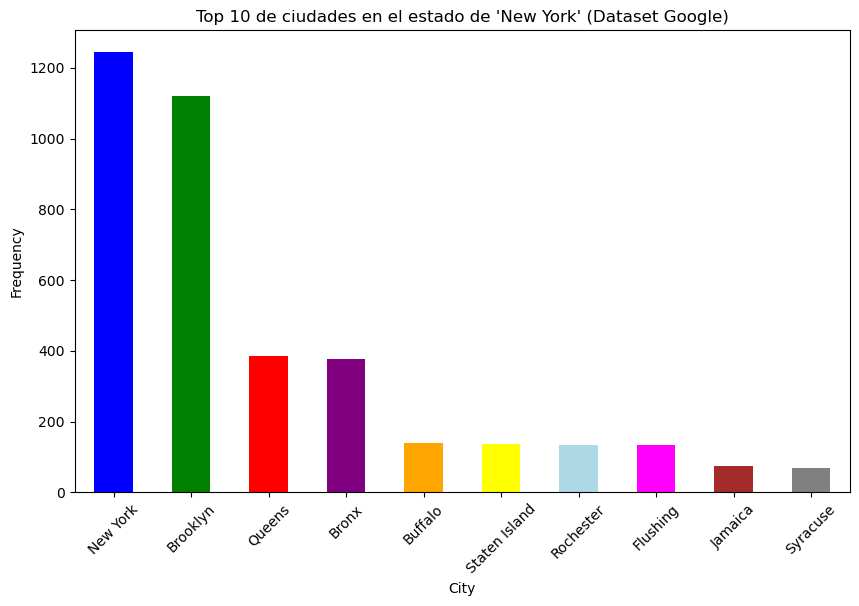

In [95]:
new_york_cities = restaurant[restaurant['state'] == 'New_York']

top_cities = new_york_cities['city'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'LightBlue', 'magenta', 'brown', 'gray']
top_cities.plot(kind='bar', color = colors)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title("Top 10 de ciudades en el estado de 'New York' (Dataset Google)")
plt.xticks(rotation=45)  
plt.show()

Siguiendo la misma línea del gráfico previo en donde Nueva York se encuentra en el primer puesto, en el presente gráfico se exhibe el "top 5" de ciudades en el estado de Nueva York con el mayor número de negocios, con el propósito de identificar la ciudad más óptima dentro de todo el estado.

*Top 10 de ciudades en el Estado de Pennsylvania*

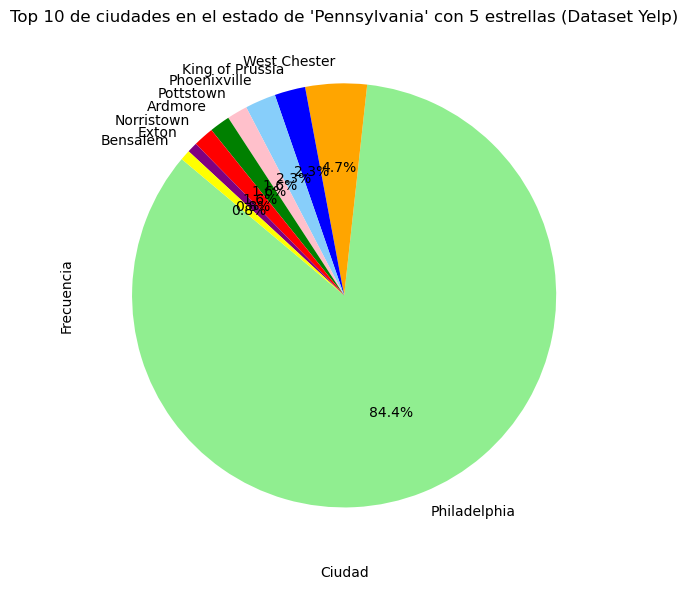

In [96]:
df_pa = business[business['state'] == 'Pennsylvania']

top_cities_pa = df_pa['city'].value_counts().head(10)

df_top_cities_pa = df_pa[df_pa['city'].isin(top_cities_pa.index)]

df_stars_5_pa = df_top_cities_pa[df_top_cities_pa['stars'] == 5.0]

city_counts = df_stars_5_pa['city'].value_counts()

plt.figure(figsize=(10, 6))
city_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'orange', 'blue', 'lightskyblue', 'pink', 'green', 'red', 'purple', 'yellow', 'LightBlue'], startangle=140)
plt.title("Top 10 de ciudades en el estado de 'Pennsylvania' con 5 estrellas (Dataset Yelp)")
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tras analizar el gráfico anterior, se desprende que dentro del territorio de Pennsylvania, la ciudad con el mayor número de establecimientos con calificación de 5 estrellas es Philadelphia. Esta observación nos lleva a concluir que Philadelphia alberga la mayor cantidad de establecimientos con la máxima calificación de 5 estrellas en comparación con otras ciudades dentro del estado.

*Top de ciudades en el estado de california*

Este top de ciudades de california se realiza debido a que el Estado de California se ve reflejado en el top 5 de Estados en ambas bases de datos tanto de YELP como de Google, así que consideramos relevante su análisis.

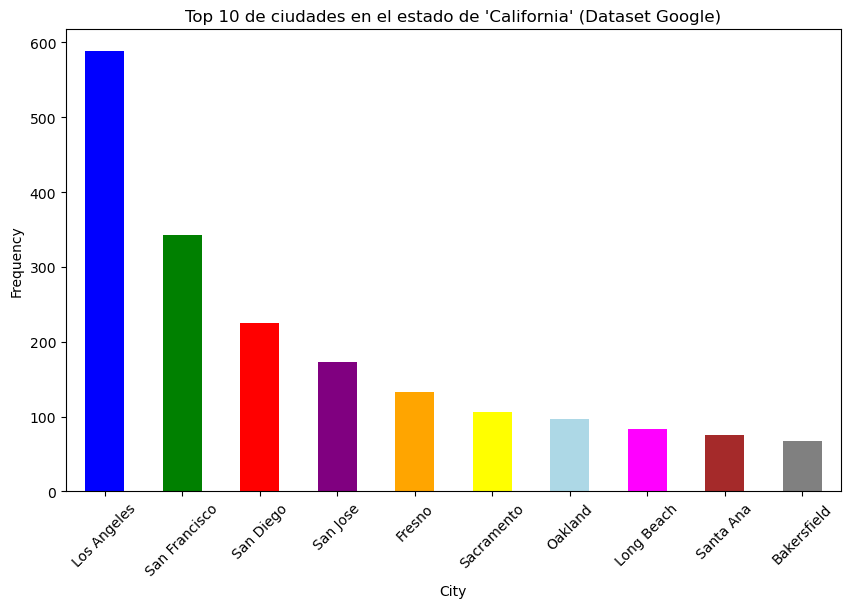

In [97]:
California_cities = restaurant[restaurant['state'] == 'California']

top_cities = California_cities['city'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'LightBlue', 'magenta', 'brown', 'gray']
top_cities.plot(kind='bar', color = colors)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title("Top 10 de ciudades en el estado de 'California' (Dataset Google)")
plt.xticks(rotation=45)  
plt.show()

Debido a que el Estado de California se encuentra en el top 5 de ambas aplicaciones, investigamos el top 5 de las ciudades con mayor número de negocios en dicho Estado, para también tenerlo en consideración para futuras inversiones.

*Top de ciudades en el Estado de Florida*

Este top de ciudades de Florida se realiza debido a que el Estado de California se ve reflejado en el top 5 de Estados en ambas bases de datos tanto de YELP como de Google, así que consideramos relevante su análisis.

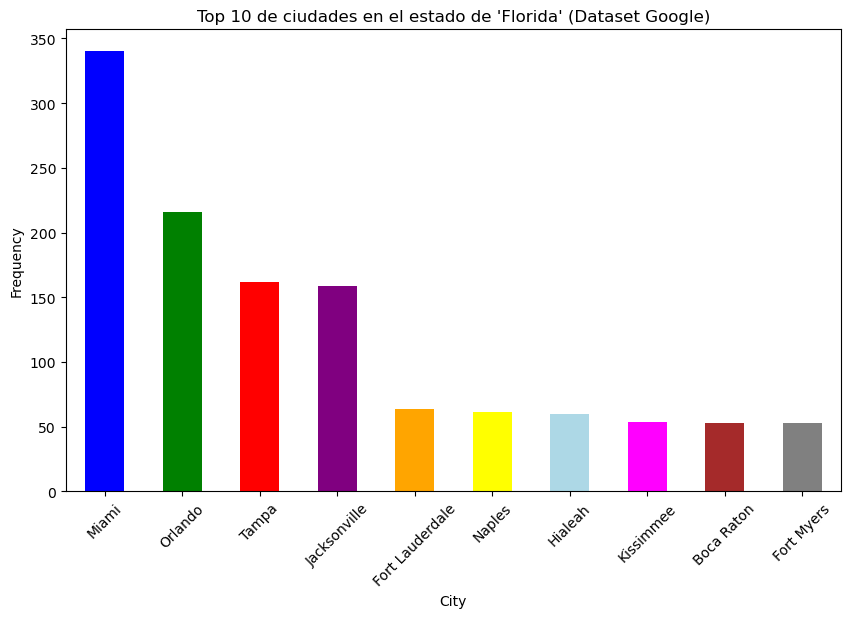

In [98]:
florida_cities = restaurant[restaurant['state'] == 'Florida']

top_cities = florida_cities['city'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'LightBlue', 'magenta', 'brown', 'gray']
top_cities.plot(kind='bar', color = colors)
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title("Top 10 de ciudades en el estado de 'Florida' (Dataset Google)")
plt.xticks(rotation=45)  
plt.show()

Debido a que el Estado de Florida se encuentra en el top 5 de ambas aplicaciones, investigamos el top 5 de las ciudades con mayor número de negocios en dicho Estado, para también tenerlo en consideración para futuras inversiones.

*Top de establecimiento con mayor numero de visitas*

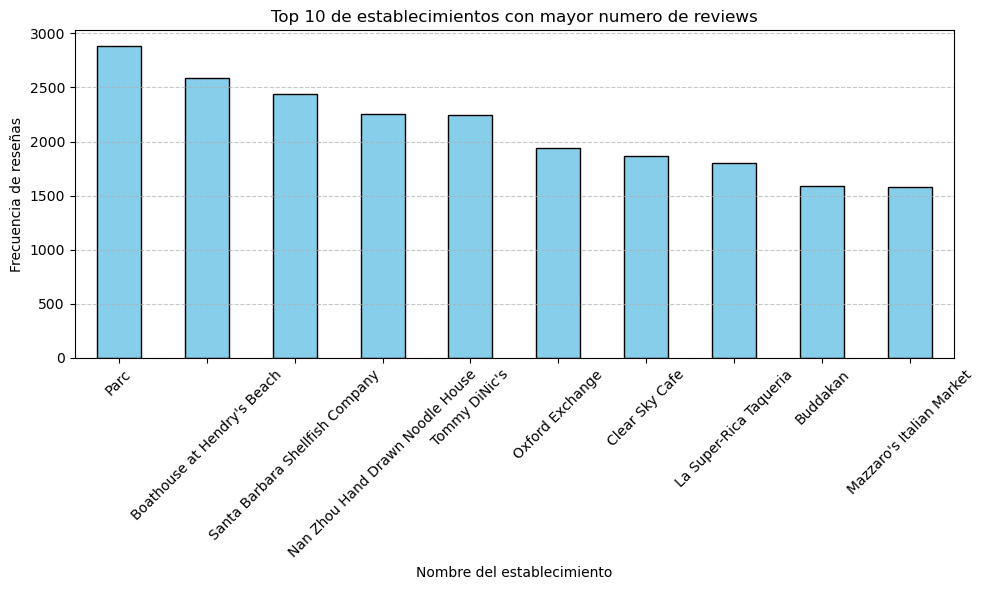

In [101]:
merged_df = pd.merge(business[['id_business', 'name']], reviews_yelp[['id_business']], on='id_business')

top_names = merged_df['name'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
top_names.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 de establecimientos con mayor numero de reviews')
plt.xlabel('Nombre del establecimiento')
plt.ylabel('Frecuencia de reseñas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

*Top por categoria en google.*

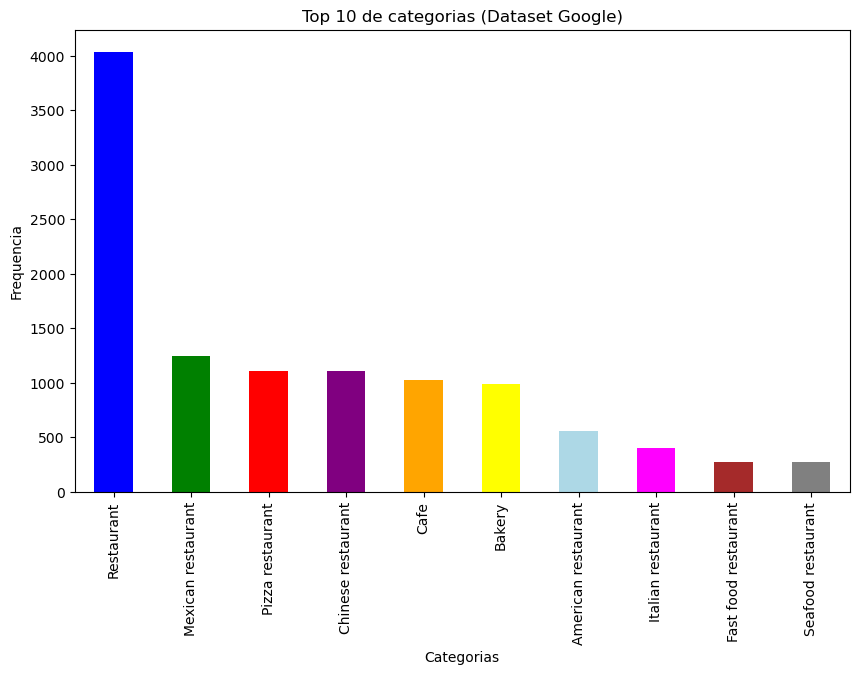

In [103]:
top_10_categories = restaurant['category'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'LightBlue', 'magenta', 'brown', 'gray']
top_10_categories.plot(kind='bar', color=colors)
plt.xlabel('Categorias')
plt.ylabel('Frequencia')
plt.title('Top 10 de categorias (Dataset Google)')
plt.xticks(rotation=90) 
plt.show()

Tras examinar la gráfica previamente presentada con la data proveniente de Google, se puede inferir que la categoría que exhibe una mayor recurrencia y, por consiguiente, la que atrae a un mayor número de clientes, es la de "restaurante". Por lo tanto, se recomienda considerar esta categoría como la principal opción al evaluar la viabilidad de realizar una inversión.

*Top por categoria en YELP.*

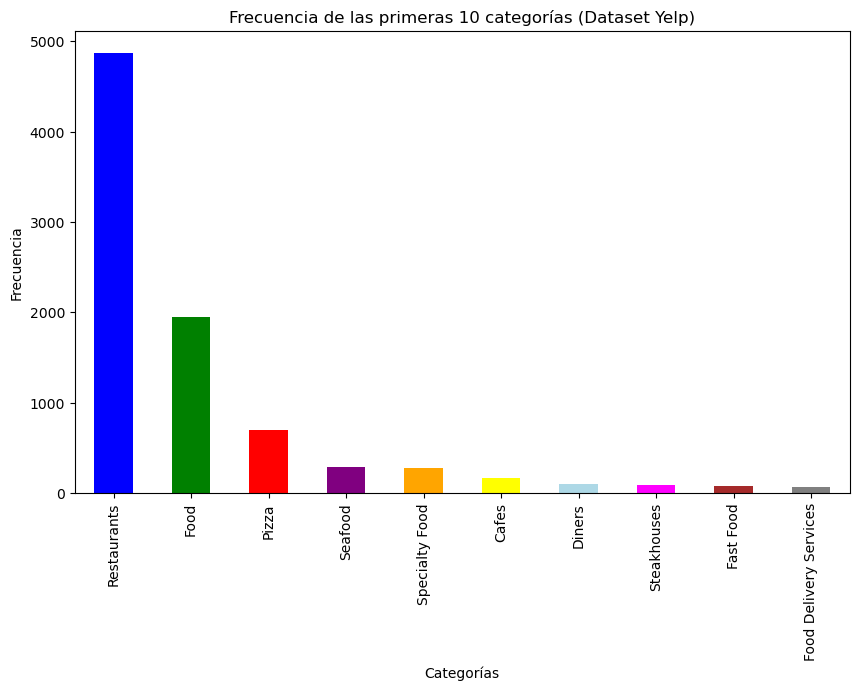

In [104]:
category_counts = business['first_category'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'LightBlue', 'magenta', 'brown', 'gray']
category_counts.plot(kind='bar', color=colors)
plt.title('Frecuencia de las primeras 10 categorías (Dataset Yelp)')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

Después de examinar la gráfica previamente presentada con la data proveniente de YELP, se puede inferir que la categoría que exhibe una mayor recurrencia y, por consiguiente, la que atrae a un mayor número de clientes, es la de "restaurants". Por lo tanto, se recomienda considerar esta categoría como la principal opción al evaluar la viabilidad de realizar una inversión.

*Top de categorias con mejor calificación*

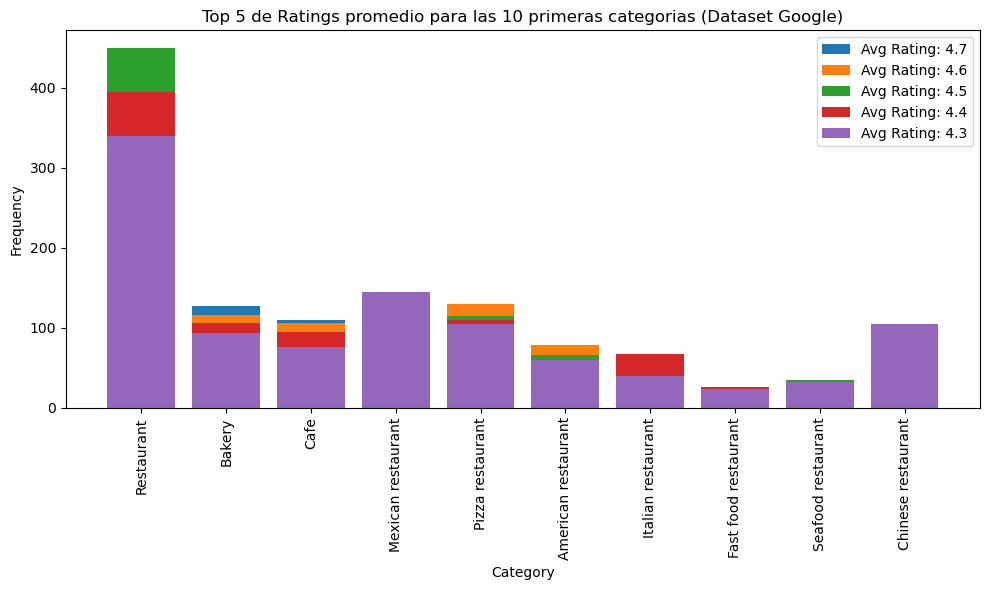

In [118]:
top_10_categories = restaurant['category'].value_counts().nlargest(10).index

top_categories_data = restaurant[restaurant['category'].isin(top_10_categories)]

top_5_avg_ratings = top_categories_data['avg_rating'].value_counts().nlargest(5).index.sort_values(ascending=False)

plt.figure(figsize=(10, 6))

for avg_rating in top_5_avg_ratings:

    category_counts = top_categories_data[top_categories_data['avg_rating'] == avg_rating]['category'].value_counts()
    
    if not category_counts.empty:
        plt.bar(category_counts.index, category_counts, label=f'Avg Rating: {avg_rating}')

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Top 5 de Ratings promedio para las 10 primeras categorias (Dataset Google)')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

Este gráfico ilustra el promedio de calificaciones para cada categoría, lo que permite identificar las categorías que son predominantemente aceptadas y que reciben más reseñas positivas.

*Top 5 de restaurantes con mejor calificación*

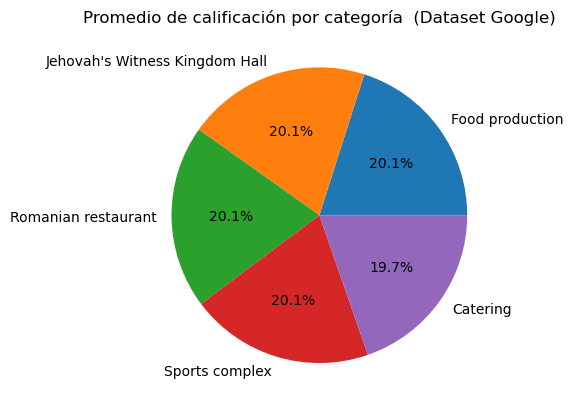

In [119]:
restaurant['first_category'] = restaurant['category'].str.split(',').str[0]

avg_rating_per_category = restaurant.groupby('first_category')['avg_rating'].mean().nlargest(5)

avg_rating_per_category.plot(kind='pie', autopct='%1.1f%%')
plt.title('Promedio de calificación por categoría  (Dataset Google)')
plt.ylabel('')
plt.show()

El análisis del gráfico permite inferir que dentro del sector gastronómico, los cinco establecimientos con las calificaciones más altas han sido identificados. Este hallazgo proporciona información relevante para la toma de decisiones en relación a posibles inversiones dentro del ámbito gastronómico.